In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random as rd
%matplotlib inline

In [2]:
##### Doing this in Python was too slow. Used R instead 

## Use when doing full dataset analysis
#df = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2016.txt',sep='\t',engine='python')
## Trim Dataset by dropping unnecessary columns and filter to business relevant data only
#df.drop(['NPI','NPPES_ENTITY_CODE','NPPES_PROVIDER_LAST_ORG_NAME','NPPES_PROVIDER_FIRST_NAME','NPPES_PROVIDER_MI','NPPES_PROVIDER_STREET1','NPPES_PROVIDER_STREET2','HCPCS_DESCRIPTION'],axis=1,inplace = True)
#df = df[(df['MEDICARE_PARTICIPATION_INDICATOR']=='Y') & (df['NPPES_PROVIDER_COUNTRY']=='US') & (df['PROVIDER_TYPE']=='Diagnostic Radiology')]
#df.drop(['MEDICARE_PARTICIPATION_INDICATOR','NPPES_PROVIDER_COUNTRY','PROVIDER_TYPE'],axis=1,inplace = True)

df = pd.read_csv('MedicareData.csv')
df.drop(['Unnamed: 0'],inplace = True, axis = 1)

In [3]:
# Further subsegment the data to only include data in California
df = df[(df['NPPES_PROVIDER_STATE']=='CA') & (df['HCPCS_DRUG_INDICATOR']=='N')]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100184 entries, 266 to 1259858
Data columns (total 16 columns):
NPPES_CREDENTIALS                98969 non-null object
NPPES_PROVIDER_GENDER            100184 non-null object
NPPES_PROVIDER_CITY              100184 non-null object
NPPES_PROVIDER_ZIP               100184 non-null int64
NPPES_PROVIDER_STATE             100184 non-null object
PROVIDER_TYPE                    100184 non-null object
PLACE_OF_SERVICE                 100184 non-null object
HCPCS_CODE                       100184 non-null object
HCPCS_DRUG_INDICATOR             100184 non-null object
LINE_SRVC_CNT                    100184 non-null float64
BENE_UNIQUE_CNT                  100184 non-null int64
BENE_DAY_SRVC_CNT                100184 non-null int64
AVERAGE_MEDICARE_ALLOWED_AMT     100184 non-null float64
AVERAGE_SUBMITTED_CHRG_AMT       100184 non-null float64
AVERAGE_MEDICARE_PAYMENT_AMT     100184 non-null float64
AVERAGE_MEDICARE_STANDARD_AMT    100184 non-nu

In [5]:
df.head()

,NPPES_CREDENTIALS,NPPES_PROVIDER_GENDER,NPPES_PROVIDER_CITY,NPPES_PROVIDER_ZIP,NPPES_PROVIDER_STATE,PROVIDER_TYPE,PLACE_OF_SERVICE,HCPCS_CODE,HCPCS_DRUG_INDICATOR,LINE_SRVC_CNT,BENE_UNIQUE_CNT,BENE_DAY_SRVC_CNT,AVERAGE_MEDICARE_ALLOWED_AMT,AVERAGE_SUBMITTED_CHRG_AMT,AVERAGE_MEDICARE_PAYMENT_AMT,AVERAGE_MEDICARE_STANDARD_AMT
266,M.D,M,SAN DIEGO,92103,CA,Diagnostic Radiology,F,20206,N,14.0,13,14,60.557143,1116.0,47.246429,46.050714
267,M.D,M,SAN DIEGO,92103,CA,Diagnostic Radiology,F,32405,N,17.0,17,17,106.638824,250.0,83.606471,81.733529
268,M.D,M,SAN DIEGO,92103,CA,Diagnostic Radiology,F,35476,N,12.0,11,12,224.944167,7673.0,176.355833,165.689167
269,M.D,M,SAN DIEGO,92103,CA,Diagnostic Radiology,F,36558,N,25.0,25,25,268.842800,3644.0,210.775600,223.884000
270,M.D,M,SAN DIEGO,92103,CA,Diagnostic Radiology,F,36561,N,30.0,30,30,361.036333,5044.5,273.369000,291.257000


In [6]:
df.describe()

,NPPES_PROVIDER_ZIP,LINE_SRVC_CNT,BENE_UNIQUE_CNT,BENE_DAY_SRVC_CNT,AVERAGE_MEDICARE_ALLOWED_AMT,AVERAGE_SUBMITTED_CHRG_AMT,AVERAGE_MEDICARE_PAYMENT_AMT,AVERAGE_MEDICARE_STANDARD_AMT
count,1.001840e+05,100184.000000,100184.000000,100184.000000,100184.000000,100184.000000,100184.000000,100184.000000
mean,8.438933e+08,73.624940,65.916893,71.381668,77.026746,335.937532,58.276993,54.274010
std,2.717836e+08,197.305172,146.935958,183.850571,202.282520,876.533688,157.890086,142.711521
min,6.267700e+04,11.000000,11.000000,11.000000,2.720000,2.860000,1.330000,1.335938
25%,9.110827e+08,17.000000,16.000000,16.000000,12.310000,53.000000,9.325000,8.777438
50%,9.269164e+08,28.000000,27.000000,27.000000,39.850000,148.000000,29.769386,28.274248
75%,9.455347e+08,60.000000,56.000000,58.000000,91.086593,329.700742,67.292866,63.712334
max,9.616148e+08,14925.000000,5626.000000,13187.000000,20216.270000,80865.000000,15849.560000,11906.130000


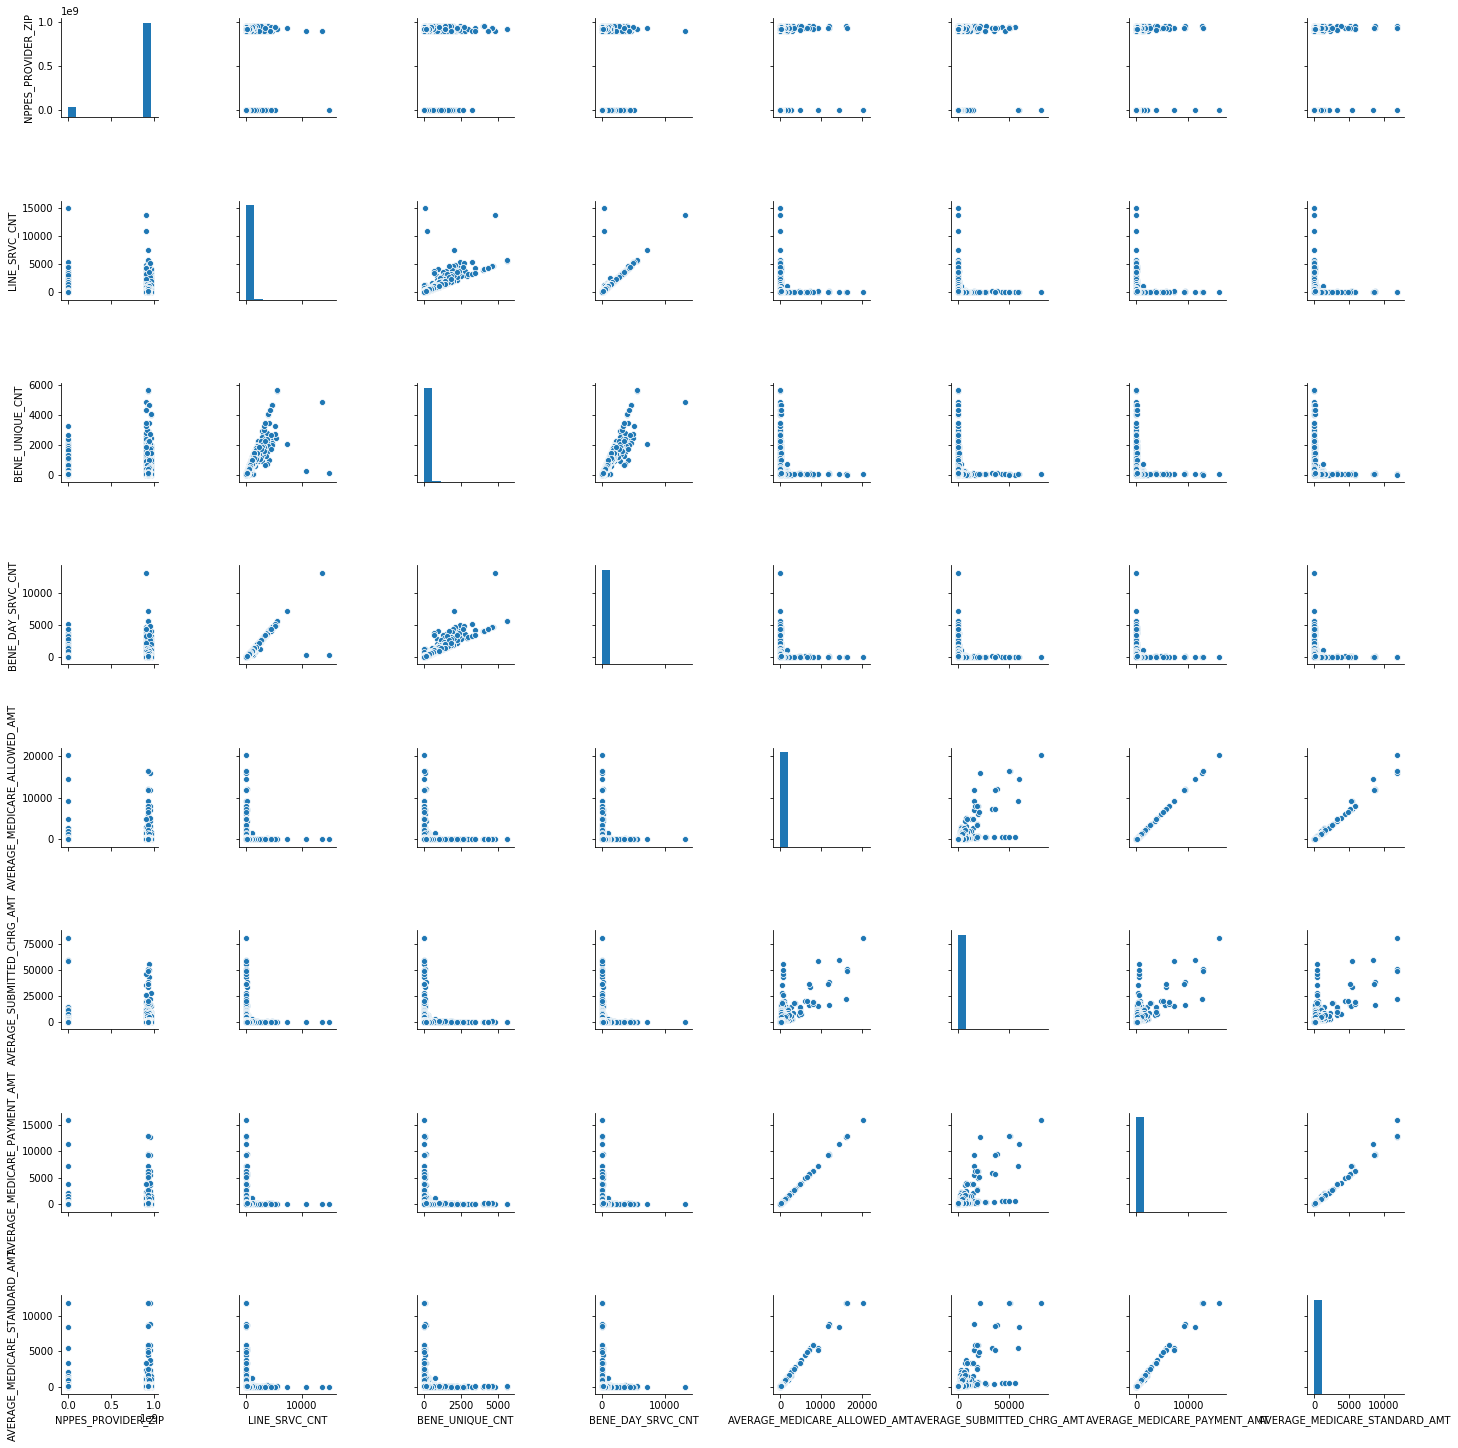

In [8]:
sns.pairplot(df)

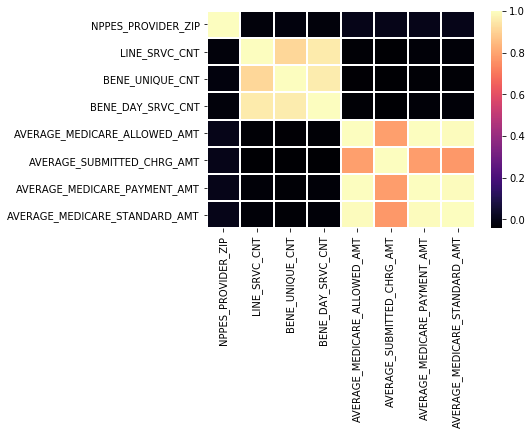

In [7]:
sns.heatmap(df.corr(),cmap = 'magma',linecolor = 'white',lw=1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
df_analyze = pd.DataFrame()
Gender_OHE = OneHotEncoder(categories = 'auto')
X = Gender_OHE.fit_transform(df.NPPES_PROVIDER_GENDER.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X,columns = ['Gender_'+str(int(i))for i in range(X.shape[1])])
dfOneHot.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_analyze = pd.concat([df,dfOneHot],axis = 1)

In [19]:
POS_OHE = OneHotEncoder(categories = 'auto')
X = POS_OHE.fit_transform(df.PLACE_OF_SERVICE.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X,columns = ['PLACEOFSERVICE'+str(int(i))for i in range(X.shape[1])])
dfOneHot.reset_index(drop=True, inplace=True)
df_analyze = pd.concat([df_analyze,dfOneHot],axis = 1)

In [21]:
# drop unwanted columns from analysis
df_analyze.drop(['NPPES_CREDENTIALS','NPPES_PROVIDER_GENDER','NPPES_PROVIDER_CITY','NPPES_PROVIDER_STATE','NPPES_PROVIDER_ZIP',
                'PROVIDER_TYPE','HCPCS_CODE','HCPCS_DRUG_INDICATOR','PLACE_OF_SERVICE',
                'BENE_UNIQUE_CNT','AVERAGE_MEDICARE_ALLOWED_AMT',
                 'AVERAGE_MEDICARE_PAYMENT_AMT'], axis=1,inplace = True)

In [23]:
# Preprocess data using normalize function
from sklearn import preprocessing
df_normalized = preprocessing.normalize(df_analyze)

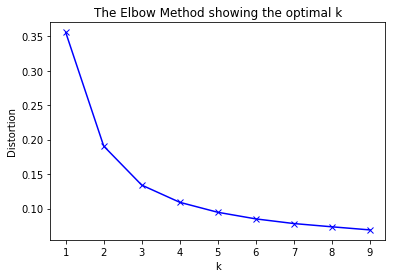

In [26]:
# Compute Scree plot for different number of clusters
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_normalized)
    kmeanModel.fit(df_normalized)
    distortions.append(sum(np.min(cdist(df_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_normalized.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

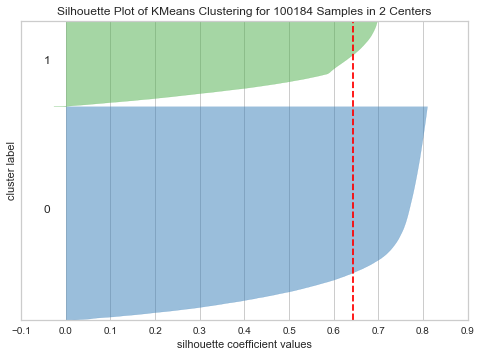

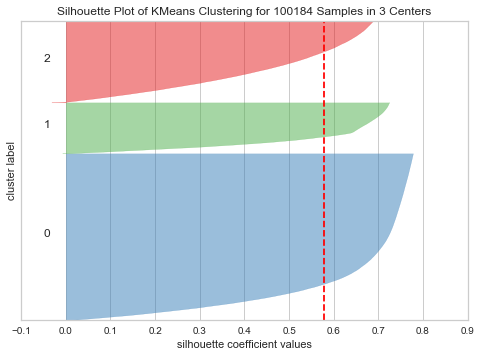

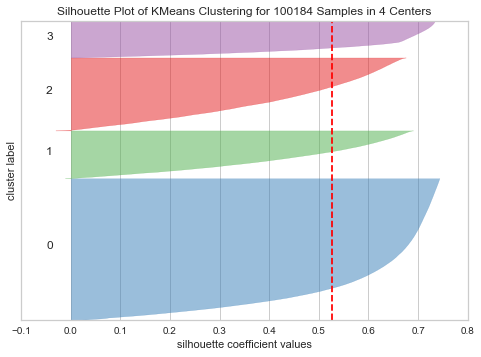

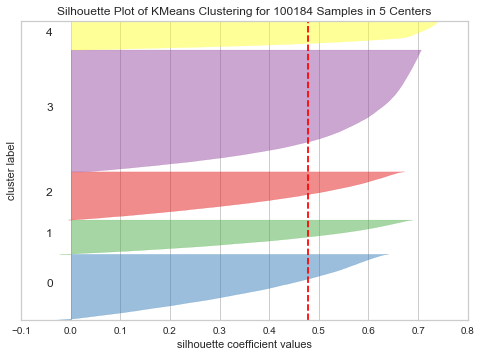

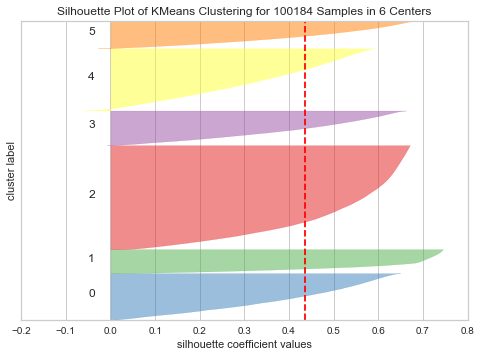

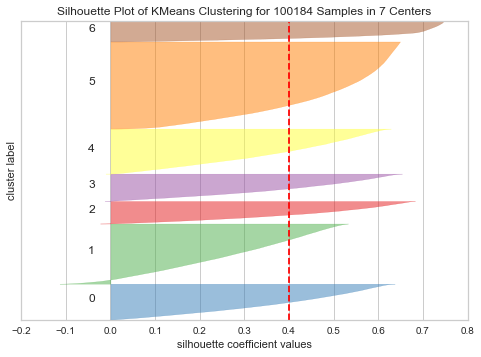

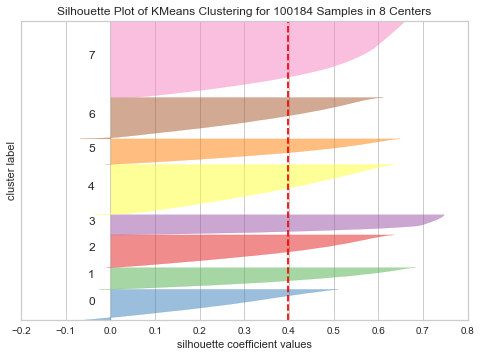

In [27]:
# Compute Silhoette Graph for different number of clusters to select
# optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
for n_clusters in range(2, 9):
    model = SilhouetteVisualizer(KMeans(n_clusters))
    model.fit(df_normalized)
    model.poof()

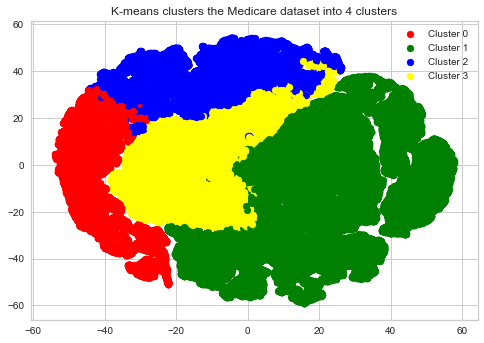

In [29]:
# Utlize TSNE to visualize data
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pylab as pl
num_of_clusters = 4
kmeans = KMeans(n_clusters = num_of_clusters)
kmeans.fit(df_normalized)

X = TSNE(n_components = 2).fit_transform(df_normalized)

for i in range(0, X.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(X[i,0], X[i, 1], c='red')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(X[i,0], X[i, 1], c='green')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(X[i,0], X[i, 1], c='blue')
    elif kmeans.labels_[i] == 3:
        c4= pl.scatter(X[i,0], X[i, 1], c='yellow')    

pl.legend([c1, c2, c3, c4], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
pl.title('K-means clusters the Medicare dataset into 4 clusters')
pl.show()

In [59]:
labels = pd.DataFrame(kmeans.labels_,columns = ['labels'])
df_describedata = pd.concat([df_analyze,labels],axis=1)

print(df_describedata[df_describedata['labels']==0.0].describe())
print(df_describedata[df_describedata['labels']==1.0].describe())
print(df_describedata[df_describedata['labels']==2.0].describe())
print(df_describedata[df_describedata['labels']==3.0].describe())


       LINE_SRVC_CNT  BENE_DAY_SRVC_CNT  AVERAGE_SUBMITTED_CHRG_AMT  \
count   12285.000000       12285.000000                12285.000000   
mean      313.263655         302.425153                   58.763626   
std       485.574402         446.391505                   60.457091   
min        11.000000          11.000000                    2.860000   
25%        78.000000          73.000000                   29.000000   
50%       158.000000         151.000000                   39.000000   
75%       357.000000         349.000000                   61.706683   
max     14925.000000       13187.000000                  812.000000   

       AVERAGE_MEDICARE_STANDARD_AMT      Gender_0      Gender_1  \
count                   12285.000000  12285.000000  12285.000000   
mean                       13.093735      0.198860      0.801140   
std                        16.211376      0.399159      0.399159   
min                         1.335938      0.000000      0.000000   
25%                 